## 实验4 第1题

In [3]:
# 导入库
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, \
    f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 将数据转为数字,分割特征和标签
def loadDataSet(filename):
    # 获取每个样本的维度(包括标签)
    dim = len(open(filename).readline().split('\t'))
    # 特征
    data = []
    # 标签
    label = []
    fr = open(filename)
    for line in fr.readlines():  #一行行的读取
        # 空列表,用来存放每一行数据
        LineArr = []
        # 以tab键划分，去除掉每个的空格
        curline = line.strip().split('\t')
        for i in range(dim-1):
            LineArr.append(float(curline[i]))
        data.append(LineArr)
        # 最后一列
        label.append(float(curline[-1]))

    # 返回特征和标签
    return data,label

In [5]:
# 加载数据集
X_train,y_train = loadDataSet("./horse/horseColicTraining.txt")
X_test,y_test = loadDataSet("./horse/horseColicTest.txt")
print(np.shape(X_train)) # (299, 21)
print(np.shape(X_test)) # (67, 21)
print(np.shape(y_train)) # (299,)
print(np.shape(y_test)) # (67,)

(299, 21)
(67, 21)
(299,)
(67,)


In [6]:
# 创建弱分类器,决策树
# 此处填入你的代码
from sklearn.tree import DecisionTreeClassifier
# Create a weak classifier with max_depth=1
weak_clf = DecisionTreeClassifier(max_depth=1)
# Train the classifier on the training data
weak_clf.fit(X_train, y_train)
# Predict the labels on the test data
y_pred = weak_clf.predict(X_test)

In [7]:
# AdaBoost算法
def My_Adaboost(X_train,Y_train, X_test,Y_test, M=20, weak_clf=DecisionTreeClassifier(max_depth = 1)):
    n_train, n_test = len(X_train), len(X_test) # n_train=299,训练样本个数;n_test=67,测试样本个数
    # 初始化权重w
    w = np.ones(n_train) / n_train # ones生成全1数组 D = (w11,w12,...,w1N),w1i = 1 / N,i=1,2,..,N
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)] # 生成空列表
    for i in range(M):    # M为基学习器个数
        # 使用特定权重拟合分类器
        weak_clf.fit(X_train, Y_train, sample_weight = w) # 用训练器数据拟合分类器模型
        pred_train_i = weak_clf.predict(X_train) # 预测(-1/1)
        pred_test_i = weak_clf.predict(X_test)

        # miss相当于I(Gm(x)!=y),I为指示函数;pred_train_i相当于Gm(x)
        miss = [int(x) for x in (pred_train_i != Y_train)] # pred_train_i != Y_train:x=0;pred_train_i == Y_train:x=1
        print("weak_clf_%02d train acc: %.4f"% (i + 1, 1 - sum(miss) / n_train))
        # 基学习器Gm(x)
        # err_m = w * I(Gm(x)!=y),I为指示函数,err_m相当于分类误差率em
        # 错分率=分类错误样本权之和（经过归一化）
        err_m = np.dot(w, miss) # 矩阵乘积
        # Gm(x)的系数:Alpha_m,即最终集成使用的的基学习器的权重
        alpha_m = 0.5 * np.log((1 - err_m) / float(err_m))
        # 更新训练样本的权重,if x==1返回x,else 返回-1
        miss2 = [x if x==1 else -1 for x in miss] # miss2 = -1 * y_i * G(x_i) = 1 / -1
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2])) #multiply()函数对应元素相乘
        w = w / sum(w)

        # 添加到prediction
        pred_train_i = [1 if x == 1 else -1 for x in pred_train_i] # 返回-1/1
        pred_test_i = [1 if x == 1 else -1 for x in pred_test_i]
        # 组合分类器,构建最终的分类器线性组合f(x),pred_train = f(x)
        pred_train = pred_train + np.multiply(alpha_m, pred_train_i)
        pred_test = pred_test + np.multiply(alpha_m, pred_test_i)

    # 当x>0，sign(x)=1;当x=0，sign(x)=0; 当x<0， sign(x)=-1
    pred_train = (pred_train > 0) * 1 # * 1 是为了将True/False变成1/0
    pred_test = (pred_test > 0) * 1
    # 训练精度
    print("Accuracy of train is",sum(pred_train == y_train) / n_train)
    # 测试精度
    print("Accuracy of test is",sum(pred_test == y_test) / n_test)

    return  pred_train,pred_test

In [8]:
# 预测测试集标签
y_train_pred,y_test_pred =My_Adaboost(X_train, y_train, X_test, y_test, M=20, weak_clf=weak_clf)

weak_clf_01 train acc: 0.7157
weak_clf_02 train acc: 0.7157
weak_clf_03 train acc: 0.4047
weak_clf_04 train acc: 0.6187
weak_clf_05 train acc: 0.6421
weak_clf_06 train acc: 0.5953
weak_clf_07 train acc: 0.6254
weak_clf_08 train acc: 0.4047
weak_clf_09 train acc: 0.6789
weak_clf_10 train acc: 0.4749
weak_clf_11 train acc: 0.6187
weak_clf_12 train acc: 0.5418
weak_clf_13 train acc: 0.4047
weak_clf_14 train acc: 0.6221
weak_clf_15 train acc: 0.4047
weak_clf_16 train acc: 0.6087
weak_clf_17 train acc: 0.4916
weak_clf_18 train acc: 0.6355
weak_clf_19 train acc: 0.4047
weak_clf_20 train acc: 0.6087
Accuracy of train is 0.7759197324414716
Accuracy of test is 0.7761194029850746


Confusion matrix of Label is 
 [[13  7]
 [ 8 39]]


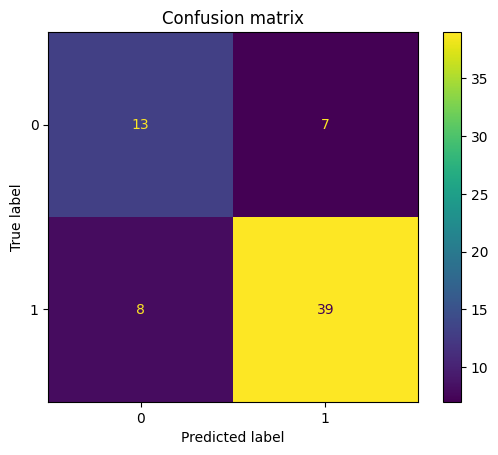

In [9]:
# 混淆矩阵格式如下：
# #[TN FP]
# #[FN TP]
#生成混淆矩阵，此处填入你的代码。（3）
from sklearn.metrics import confusion_matrix
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix of Label is \n",cm)
# confusion_matrix(混淆矩阵), display_labels(标签名称列表)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
# 画出混淆矩阵
disp.plot()
plt.title("Confusion matrix")
# 保存
plt.savefig("Confusion_matrix")
# 显示
plt.show()

In [10]:
# 计算死亡率#,标签1表示存活,0表示死亡
print("Rate of death is ",np.sum(y_test_pred == 0) / len(y_test))

Rate of death is  0.31343283582089554


In [11]:
# 精确度 P = TP / (TP + FP)
#输出精确度，此处填入你的代码。（4）
# Calculate precision
precision = precision_score(y_test, y_test_pred)
# Print precision
print("Precision of Label is", precision)

Precision of Label is 0.8478260869565217


In [12]:
# 召回率R = TP / (TP + FN)
print("Recall of Label is",recall_score(y_test,y_test_pred))

Recall of Label is 0.8297872340425532


In [14]:
# F1度量 F1 = (2 x P x R) / (P + R)
print("F1 of Label is",f1_score(y_test,y_test_pred))

F1 of Label is 0.8387096774193549


In [16]:
# 与sklearn的AdaBoostClassifier的结果比较
# 此处填入你的代码。（5）
model = AdaBoostClassifier(n_estimators=20, base_estimator=DecisionTreeClassifier(max_depth=1))
# 拟合
model.fit(X_train, y_train)
# 预测
y_pred = model.predict(X_test)
# 输出精度报告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65        20
         1.0       0.86      0.81      0.84        47

    accuracy                           0.78        67
   macro avg       0.74      0.75      0.74        67
weighted avg       0.79      0.78      0.78        67



/home/ist/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [17]:
# 绘制P-R曲线
def PR_curve(y,pred):
    # pos为真实的正例标签个数
    pos = np.sum(y == 1)
    # 从大到小排序
    pred_sort = np.sort(pred)[::-1]
    # 从大到小排序的索引
    index = np.argsort(pred)[::-1]
    y_sort = y[index]

    # Precision
    Pre = []
    # Recall
    Rec = []
    for i, item in enumerate(pred_sort):
        if i == 0:
            # 因为计算precision的时候分母要用到i，当i为0时会出错，所以单独列出
            Pre.append(0)
            Rec.append(0)
        else:
            # Precision = TP / TP + FP,i = TP + FP,预测为1的个数
            Pre.append(np.sum((y_sort[:i] == 1)) /i)
            # Recall = TP / TP + FN
            Rec.append(np.sum((y_sort[:i] == 1)) / pos)

    # 画图
    # 横坐标Rec,纵坐标pre
    plt.plot(Rec, Pre, 'r')
    plt.title('Precision/Recall Curve')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 01.01])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    # 保存
    plt.savefig("P_R_Curve")
    plt.show()

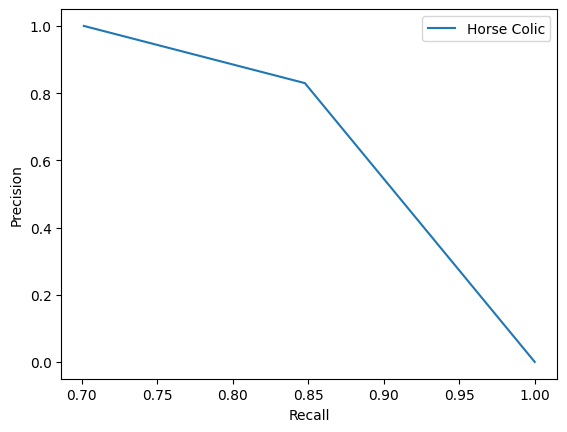

In [18]:
# 绘制P-R曲线
# PR_curve(np.array(y_test),y_test_pred)
# 预测

# 绘制PR曲线  这个曲线绘图不好
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, y_test_pred,pos_label=1)
fig = plt.figure()
plt.plot(precision, recall, label='Horse Colic')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

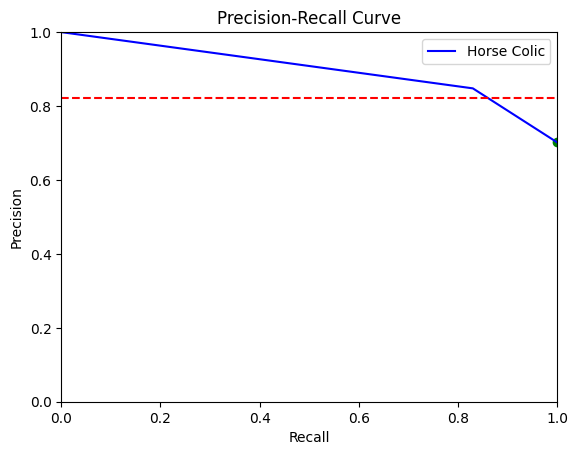

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Calculate precision and recall
precision, recall, threshold = precision_recall_curve(y_test, y_test_pred,pos_label=1)
# Calculate average precision score
ap = average_precision_score(y_test, y_test_pred)
# Create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue', label='Horse Colic')
# Add title and axis labels
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
# Add legend
ax.legend()
# Adjust x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
# Add reference line or point
ax.plot([0, 1], [ap, ap], linestyle='--', color='red', label='Average Precision')
ax.scatter(recall[np.argmax(precision + recall)], precision[np.argmax(precision + recall)], color='green', label='Best F1')
# Display plot
plt.show()